<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_004_multi_camp/_002_knn_buy_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import numpy as np
# iso-8859-1
buy = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/ps_buy.csv', encoding='utf-8')
buy

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,26,1600000,구매
0,35,2100000,비구매
1,26,2200000,비구매
2,29,2600000,구매
3,22,1100000,비구매
4,28,2500000,구매
5,31,1700000,비구매


In [102]:
buy.columns = ['age', 'pay', 'buy_flag']

In [103]:
buy.head()

,age,pay,buy_flag
0,1.612452,0.131024,-0.707107
1,-0.620174,0.327561,-0.707107
2,0.124035,1.113707,1.414214
3,-1.612452,-1.834341,-0.707107
4,-0.124035,0.917170,1.414214


In [104]:
buy_int = np.array([0] * len(buy))  # 맨 마지막 열
buy_int[buy.buy_flag == '구매'] = 1
buy_int[buy.buy_flag == '비구매'] = 0
buy_int

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([0, 0, 0, 0, 0, 0])

In [105]:
buy.buy_flag = buy_int
test_buy = buy
test_buy

,age,pay,buy_flag
0,1.612452,0.131024,0
1,-0.620174,0.327561,0
2,0.124035,1.113707,0
3,-1.612452,-1.834341,0
4,-0.124035,0.917170,0
5,0.620174,-0.655122,0


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(buy)

buy = scaler.transform(buy)
scaler.fit(buy)

buy = pd.DataFrame(buy)

In [107]:
buy.columns = ['age', 'pay', 'buy_flag']
buy

,age,pay,buy_flag
0,1.612452,0.131024,0.0
1,-0.620174,0.327561,0.0
2,0.124035,1.113707,0.0
3,-1.612452,-1.834341,0.0
4,-0.124035,0.917170,0.0
5,0.620174,-0.655122,0.0


In [108]:
X = buy.iloc[:, [1,2]].values
Y = buy.iloc[:, 0].values

x_test = test_buy.iloc[:, [1,2]].values
y_test = test_buy.iloc[:, 0].values

x_test, y_test

(array([[ 0.13102436,  0.        ],
        [ 0.32756089,  0.        ],
        [ 1.11370703,  0.        ],
        [-1.83434099,  0.        ],
        [ 0.91717049,  0.        ],
        [-0.65512178,  0.        ]]),
 array([ 1.61245155, -0.62017367,  0.12403473, -1.61245155, -0.12403473,
         0.62017367]))

- 모델을 만들고 훈련시키기 시작

In [109]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(x_test, y_test)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [110]:
# 결정계수 표시
r2 = model.score(x_test, y_test)
print("결정계수 ", r2)


결정계수  0.04533333333333355


In [111]:
result = model.predict(x_test)
print(result)
print(y_test)

[ 0.32249031  0.32249031  0.32249031 -0.02480695  0.32249031 -0.02480695]
[ 1.61245155 -0.62017367  0.12403473 -1.61245155 -0.12403473  0.62017367]


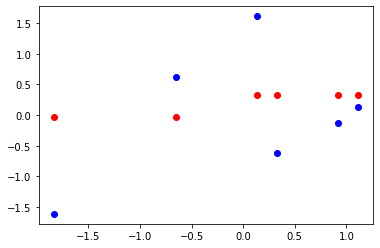

In [112]:
# 시각화

plt.scatter(test_buy.pay, y_test, marker='o', c='blue')
plt.scatter(test_buy.pay, result, marker='o', c='red')
plt.show()